## Final Project Submission

Please fill out:
* Student name: Lyndsay Maggin
* Student pace: self paced / part time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import linear_model
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Understand the Data

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21597, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


#### Column Definitions

##### This dataset was created in 2016, therefore assume data is being used for 2016 housing sales

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront (0,1,nan)
* **view** - Has been viewed (0-4, nan)
* **condition** - How good the condition is ( Overall ) (1-5)
* **grade** - overall grade given to the housing unit, based on King County grading system (3-13)
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In [182]:
df['lat_long_int'] = df['lat']*df['long']

In [243]:
df = df.drop(['lat', 'long'], axis=1)

In [244]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
lat_long_int     0
dtype: int64

In [245]:
list(set(df['yr_renovated'].dropna()))[-5:]

[2011.0, 2012.0, 2013.0, 2014.0, 2015.0]

In [246]:
columns =list(df.columns)

In [247]:
for col in columns:
    print(col,':', df[col].nunique())

id : 21420
date : 372
price : 3622
bedrooms : 12
bathrooms : 29
sqft_living : 1034
sqft_lot : 9776
floors : 6
waterfront : 2
view : 5
condition : 5
grade : 11
sqft_above : 942
sqft_basement : 303
yr_built : 116
yr_renovated : 70
zipcode : 70
sqft_living15 : 777
sqft_lot15 : 8682
lat_long_int : 20817


In [248]:
df['sqft_basement'] = df['sqft_basement'].replace('?', '0.0')

In [249]:
df['sqft_basement'] = df['sqft_basement'].astype('float64')

# Synopsis

### The King County dataset is a list of homes sold between May 2014 and May 2015 in King County, Washington State (inclusive of Seattle). It is 2016 and I am a realtor in the King County Washington area working with a new family to find their forever home. Using this dataset, with my newly learned data science tools, I can predict the price that a home of interest will sell at and therefore can assist the family in entering a proper bid. 

#### Data Cleaning

In [250]:
#Out of 21597 homes, 63 do not have view information, 2376 do not have waterfront information and 3842 do not have renovation information.
#This makes up 0%, 11% and 18% of total homes respectively. For data munging purposes I will therefore assume these properties
#are not waterfront and have not been renovated. 

df = df.fillna(0)

In [251]:
categorical = ['floors', 'view', 'condition', 'grade', 'waterfront']

In [252]:
continuous = columns
for cat in categorical:
    countinuous = continuous.remove(cat)

In [253]:
continuous.remove('id')

In [254]:
continuous.remove('price')

In [255]:
continuous.remove('date')

In [258]:
continuous

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'sqft_living15',
 'sqft_lot15',
 'lat_long_int']

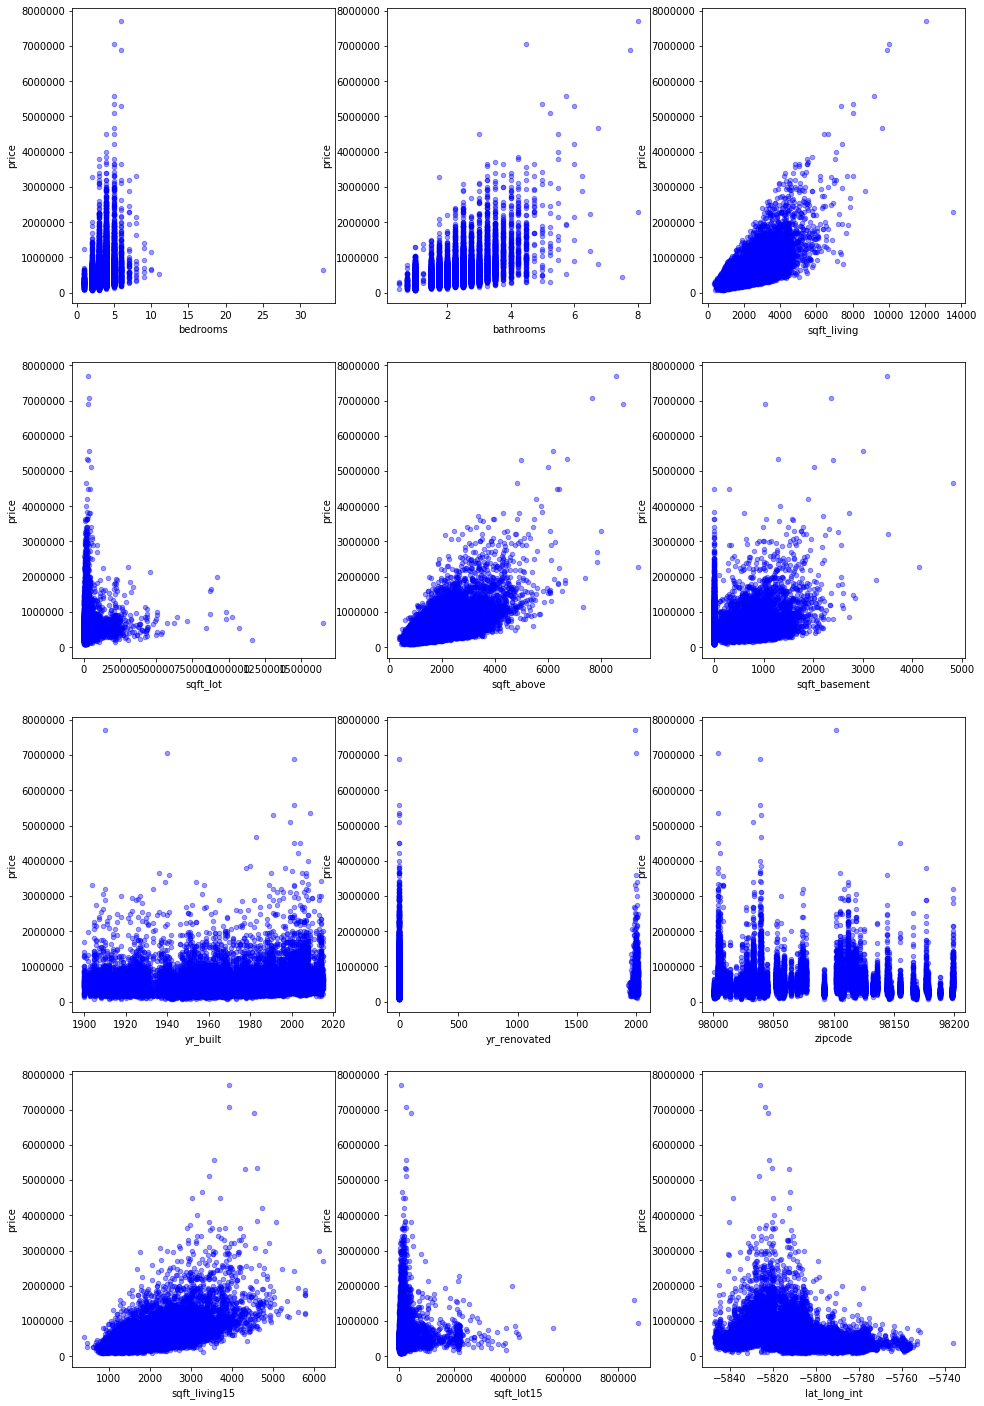

In [259]:
fig,axes = plt.subplots(4,3, figsize=(16,25))


for xcol, ax in zip(continuous, [x for v in axes for x in v]):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [260]:
#lat and log variables are multiplied together for location
#the sqft variable seem to have a linear relationship with price
#it is hard to tell about rennovation date with all of non reno figures, I will therefore remove these

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002304582D048>,
      dtype=object)

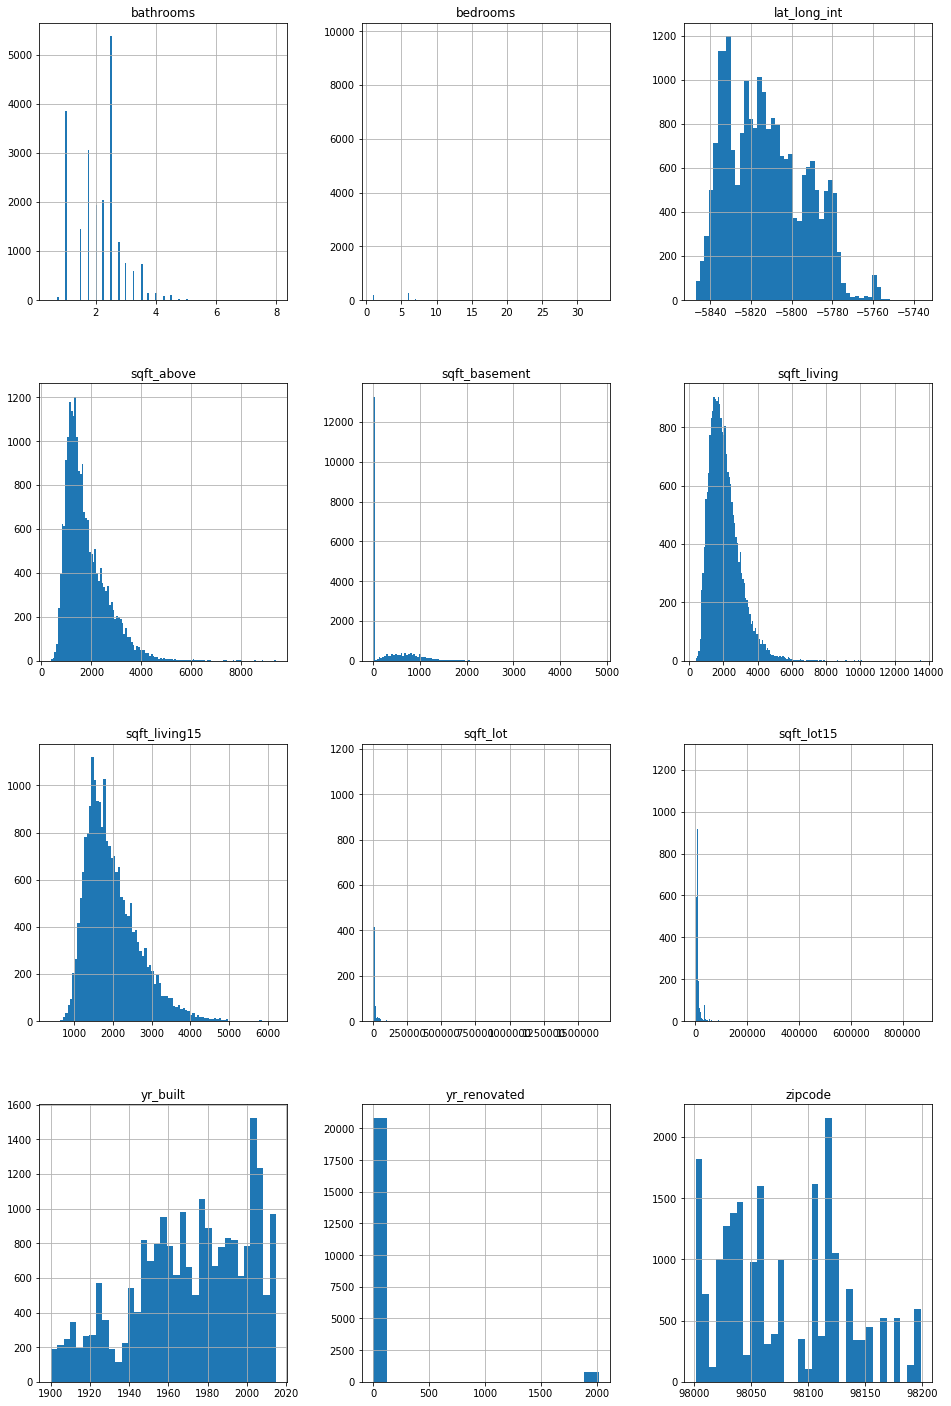

In [261]:
cont = df[continuous]
cont.hist(figsize = [16,25], bins='auto')

In [262]:
df_reno = df[['price', 'yr_renovated']]
df_reno = df_reno[df_reno.yr_renovated != 0]

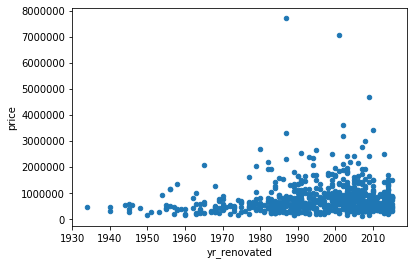

In [263]:
df_reno.plot(kind='scatter', x='yr_renovated', y='price')

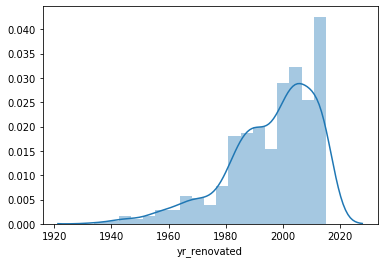

In [264]:
sns.distplot(df_reno['yr_renovated'])

In [265]:
#the majority of renovations have happened in the last 15 years, might be better to look at the relationship
#between sales price and if the home has been renovated in the last 15 years or not

In [266]:
def fifteen_years(df):
    if df['yr_renovated'] >= 2005:
        return 1
    else: 
        return 0
        
df_reno['greater_fifteen'] = df_reno.apply(fifteen_years, axis=1)

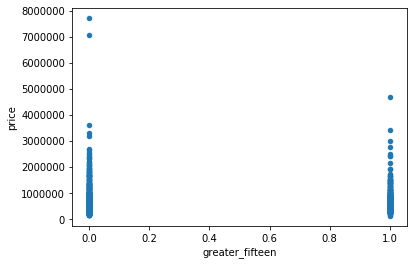

In [267]:
df_reno.plot(kind='scatter', x='greater_fifteen', y='price') #doesnt look too meaningful

In [268]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,lat_long_int
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,0.008188,-0.010799,-0.004359,0.021617,-0.010612,-0.008211,-0.002701,-0.138557,0.008888
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.321108,0.053953,0.117855,-0.053402,0.585241,0.082845,-0.265129
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,0.017900,-0.154092,0.393406,0.030690,0.055327
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.278485,0.507173,0.047177,-0.204786,0.569884,0.088303,0.057526
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.428660,0.318152,0.051060,-0.199802,0.756402,0.184342,0.038494
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021459,0.075054,-0.008830,0.114731,0.184139,0.015031,0.052946,0.004979,-0.129586,0.144763,0.718204,0.157040
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.020797,0.028414,-0.264075,0.458794,0.523989,-0.241866,0.489193,0.003793,-0.059541,0.280102,-0.010722,0.000443
waterfront,-0.003599,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,1.000000,0.380543,0.016648,0.082818,0.071778,0.083050,-0.024487,0.073939,0.028923,0.083823,0.030658,-0.002366
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.270629,-0.054452,0.090339,0.085059,0.278928,0.073083,-0.032962
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016648,0.045622,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.055808,0.002888,-0.093072,-0.003126,-0.023858


In [269]:
abs(df.corr())>.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,lat_long_int
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,True,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [270]:
df_c = df.corr().abs().stack().reset_index().sort_values(0, ascending = False)
df_c['pairs'] = list(zip(df_c.level_0, df_c.level_1))
df_c.set_index(['pairs'], inplace = True)
df_c.drop(columns = ['level_0', 'level_1'], inplace = True)
df_c.columns =['cc']
df_c.drop_duplicates(inplace = True)

In [271]:
df_c.head(10)

,cc
pairs,
"(id, id)",1.000000
"(sqft_living, sqft_above)",0.876448
"(grade, sqft_living)",0.762779
"(sqft_living15, sqft_living)",0.756402
"(grade, sqft_above)",0.756073
"(bathrooms, sqft_living)",0.755758
"(sqft_living15, sqft_above)",0.731767
"(sqft_lot15, sqft_lot)",0.718204
"(sqft_living15, grade)",0.713867


In [272]:
#you can see here that sqft_living and sqft_above are hightly correlated and therefore both variables are not needed
#as well as grade
#removing grade, sqft_above, sqft_living15

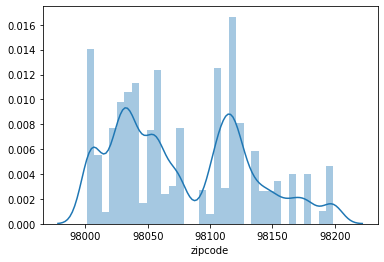

In [273]:
sns.distplot(df['zipcode'])

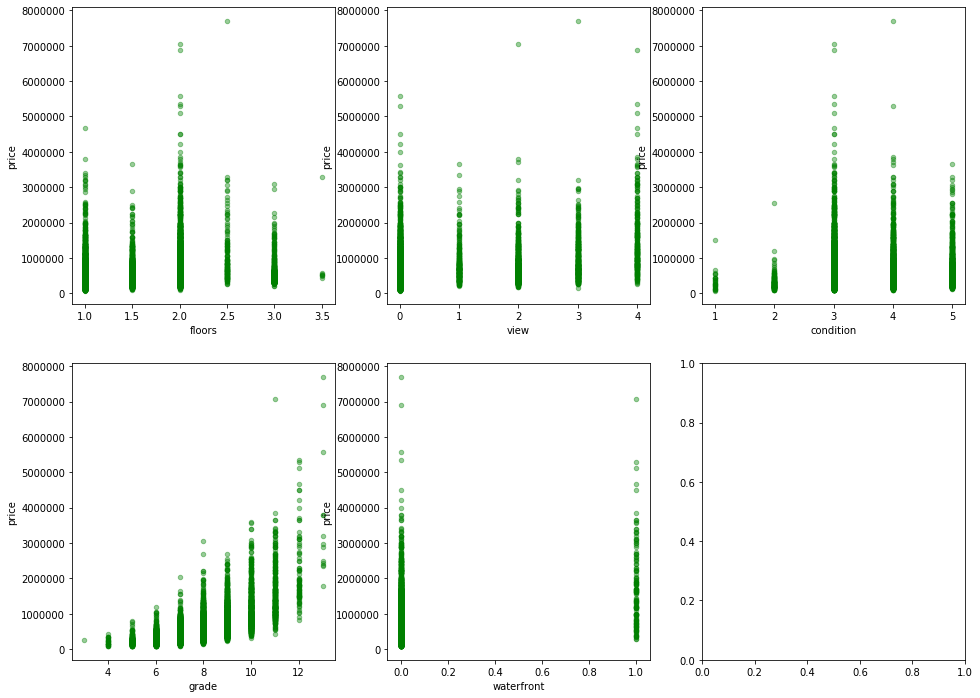

In [274]:
fig,axes = plt.subplots(2,3, figsize=(16,12))


for xcol, ax in zip(categorical, [x for v in axes for x in v]):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='g')

In [275]:
#looking at the above, view and waterfront do not seem to have any relationship with price.
#I therefore plan to remove these variables

#### Standardizing

In [276]:
#based on the charts above, I have chosen the below variables
cont_var = ['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'yr_renovated',
 'zipcode',
 'lat_long_int']

##### Logging each continuous variable with the exception of geographic variables and number of beds/baths

In [287]:
df_logged = pd.DataFrame([])

#df_logged['lg_bedrooms'] = np.log(df['bedrooms'])#
df_logged['bedrooms'] = df['bedrooms']
#df_logged['lg_bathrooms'] = np.log(df['bathrooms'])#
df_logged['bathrooms'] = df['bathrooms']
df_logged['lg_sqft_living'] = np.log(df['sqft_living'])
df_logged['lg_sqft_lot'] = np.log(df['sqft_lot'])#
#df_logged['lg_yr_reno'] = np.log(df['yr_renovated'])#
#df_logged['lg_zip'] = np.log(df['zipcode'])#
#df_logged['lg_lat_long_int'] = np.log(df['lat_long_int'])

In [288]:
#logged_continuous_variables = ['lg_sqft_living','lg_sqft_above','lg_sqft_living15' ]
logged_continuous_variables = ['bedrooms', 'bathrooms','lg_sqft_living','lg_sqft_lot']

In [289]:
df_logged['price'] = df['price']

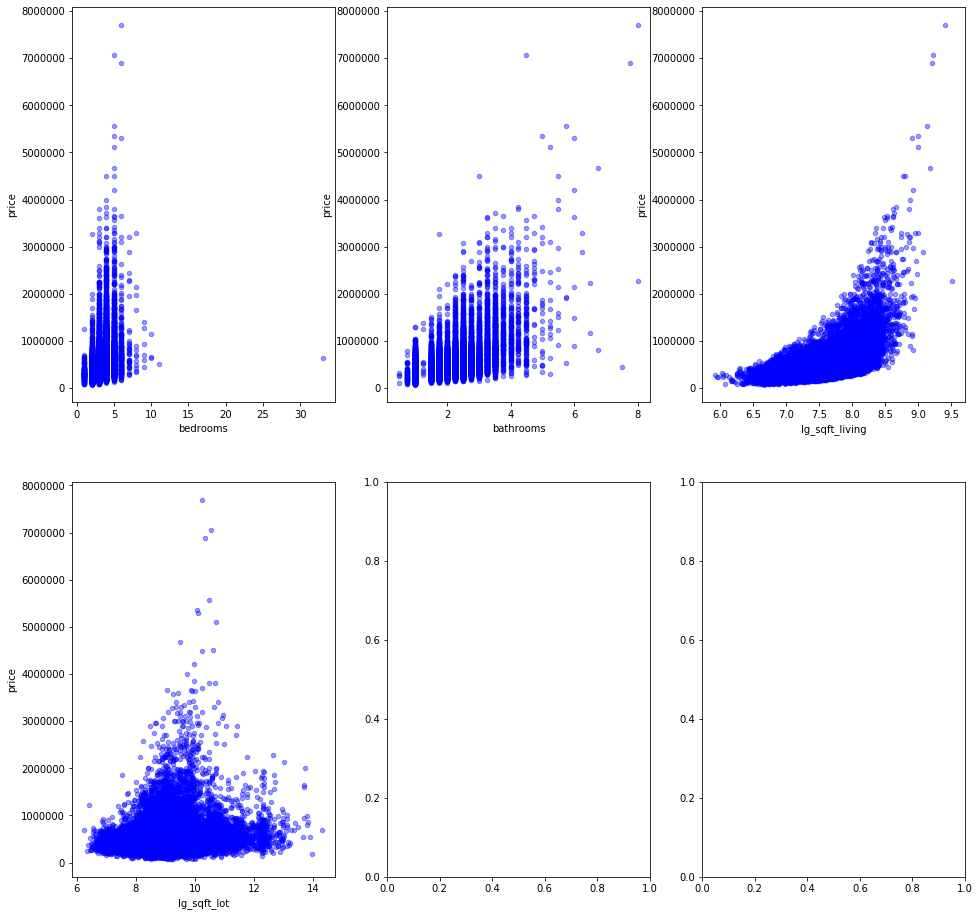

In [290]:
fig,axes = plt.subplots(2,3, figsize=(16,16))


for xcol, ax in zip(logged_continuous_variables, [x for v in axes for x in v]):
    df_logged.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [291]:
#based on the above there seems to be a linear relationship between price and sqft living space
#there also seems to be a linear relationship with number of bathrooms and a quadratic relationship with number of bedrooms

In [292]:
df_logged['bedrooms_sq'] = df['bedrooms']**2

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002304DB5B5F8>,
      dtype=object)

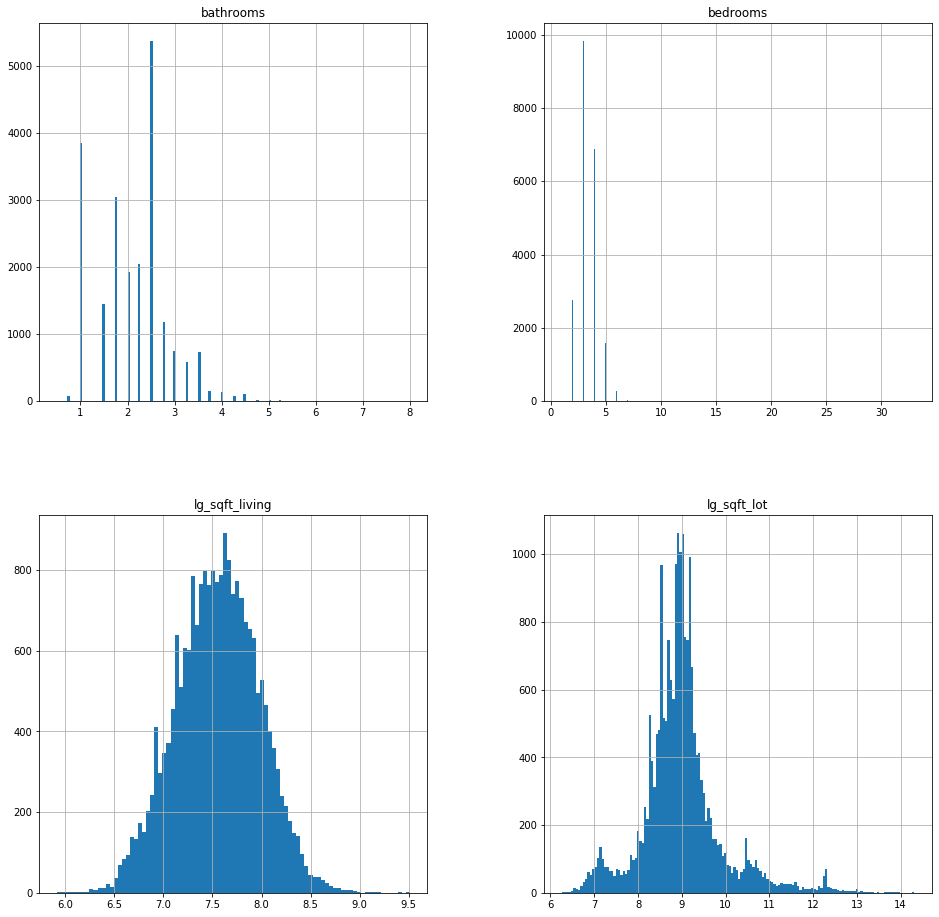

In [293]:
log_hist = df_logged[logged_continuous_variables]
log_hist.hist(figsize = [16,16], bins='auto')

##### Scaling the logged continuous variables

In [294]:
df_scaled = pd.DataFrame([])

df_scaled['scaled_bedrooms_squared'] = (df_logged['bedrooms_sq'] - np.mean(df_logged['bedrooms_sq']))/np.sqrt(np.var(df_logged['bedrooms_sq']))
df_scaled['scaled_bedrooms'] = (df_logged['bedrooms'] - np.mean(df_logged['bedrooms']))/np.sqrt(np.var(df_logged['bedrooms']))
df_scaled['scaled_bathrooms'] = (df_logged['bathrooms'] - np.mean(df_logged['bathrooms']))/np.sqrt(np.var(df_logged['bathrooms']))
df_scaled['scaled_sqft_living'] = (df_logged['lg_sqft_living'] - np.mean(df_logged['lg_sqft_living']))/np.sqrt(np.var(df_logged['lg_sqft_living']))
df_scaled['scaled_sqft_lot'] = (df_logged['lg_sqft_lot'] - np.mean(df_logged['lg_sqft_lot']))/np.sqrt(np.var(df_logged['lg_sqft_lot']))
#df_scaled['scaled_yr_reno'] = (df['yr_renovated'] - np.mean(df['yr_renovated']))/np.sqrt(np.var(df['yr_renovated']))
#df_scaled['scaled_zip'] = (df['zipcode'] - np.mean(df['zipcode']))/np.sqrt(np.var(df['zipcode']))
#df_scaled['scaled_lat'] = (df['lat'] - np.mean(df['lat']))/np.sqrt(np.var(df['lat']))
#df_scaled['scaled_long'] = (df['long'] - np.mean(df['long']))/np.sqrt(np.var(df['long']))
df_scaled['scaled_int'] = (df['lat_long_int'] - np.mean(df['lat_long_int']))/np.sqrt(np.var(df['lat_long_int']))


In [295]:
df_scaled['price'] = df['price']

In [296]:
#scaled_continuous_variables = ['scaled_sqft_living','scaled_sqft_above','scaled_sqft_living15'     ]
scaled_continuous_variables = ['scaled_bedrooms_squared', 'scaled_bedrooms','scaled_bathrooms', 'scaled_sqft_living','scaled_sqft_lot','scaled_int']

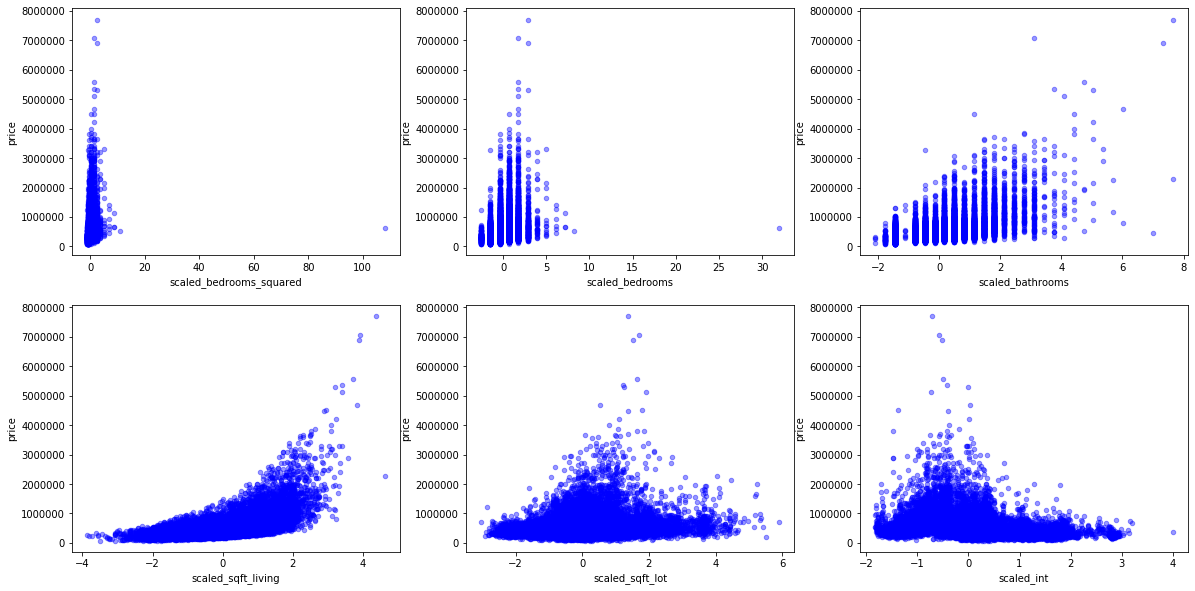

In [297]:
fig,axes = plt.subplots(2,3, figsize=(20,10))


for xcol, ax in zip(scaled_continuous_variables, [x for v in axes for x in v]):
    df_scaled.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [298]:
#remove outlier for bedrooms
df_scaled = df_scaled[df_scaled['scaled_bedrooms'] != max(df_scaled['scaled_bedrooms'])]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023050EA62B0>,
      dtype=object)

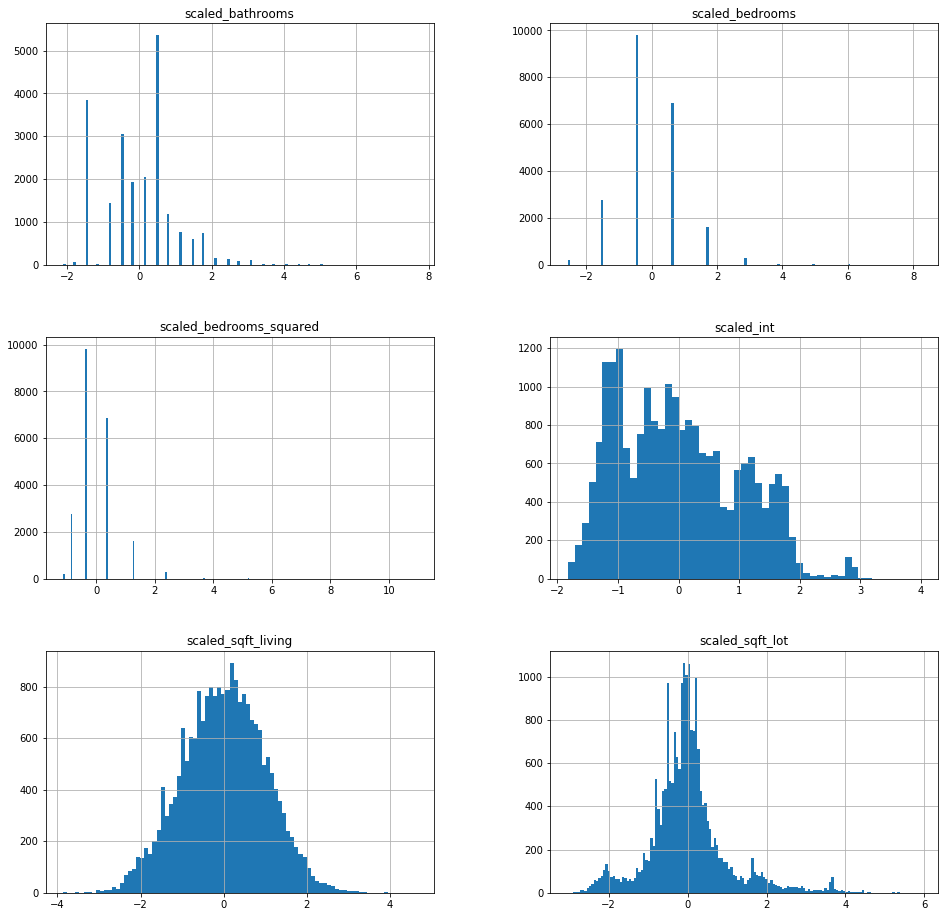

In [299]:
scaled = df_scaled[scaled_continuous_variables]
scaled.hist(figsize = [16,16], bins='auto')

In [300]:
df_std = pd.DataFrame([])

In [302]:
df_std['bedrooms_sq'] = df_scaled['scaled_bedrooms_squared']
df_std['bedrooms'] = df_scaled['scaled_bedrooms']
df_std['bathrooms'] = df_scaled['scaled_bathrooms'] 
df_std['scaled_sqft_living'] = df_scaled['scaled_sqft_living']
df_std['sqft_lot'] = df_scaled['scaled_sqft_lot']
df_std['yr_reno'] = df['yr_renovated']
df_std['zipcode'] = df['zipcode']
df_std['lat_long'] = df_scaled['scaled_int']

##### Create dummy variables for categories

In [303]:
floors_dummies = pd.get_dummies(df['floors'], prefix = 'flr', drop_first = True)
condition_dummies = pd.get_dummies(df['condition'], prefix = 'cond', drop_first = True)

In [304]:
data = pd.concat([df_std,floors_dummies, condition_dummies], axis=1)
data.head()

,bedrooms_sq,bedrooms,bathrooms,scaled_sqft_living,sqft_lot,yr_reno,zipcode,lat_long,flr_1.5,flr_2.0,flr_2.5,flr_3.0,flr_3.5,cond_2,cond_3,cond_4,cond_5
0,-0.325460,-0.402903,-1.451073,-1.125582,-0.388439,0.0,98178.0,0.206736,0,0,0,0,0,0,1,0,0
1,-0.325460,-0.402903,0.174486,0.709463,-0.113243,1991.0,98125.0,-1.296567,0,1,0,0,0,0,1,0,0
2,-0.828262,-1.482493,-1.451073,-2.131943,0.244481,0.0,98028.0,-1.189460,0,0,0,0,0,0,1,0,0
3,0.378462,0.676687,1.149821,0.070676,-0.523926,0.0,98136.0,-0.194546,0,0,0,0,0,0,0,0,1
4,-0.325460,-0.402903,-0.150626,-0.292732,0.008140,0.0,98074.0,0.058783,0,0,0,0,0,0,1,0,0


In [305]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 17 columns):
bedrooms_sq           21596 non-null float64
bedrooms              21596 non-null float64
bathrooms             21596 non-null float64
scaled_sqft_living    21596 non-null float64
sqft_lot              21596 non-null float64
yr_reno               21596 non-null float64
zipcode               21596 non-null float64
lat_long              21596 non-null float64
flr_1.5               21597 non-null uint8
flr_2.0               21597 non-null uint8
flr_2.5               21597 non-null uint8
flr_3.0               21597 non-null uint8
flr_3.5               21597 non-null uint8
cond_2                21597 non-null uint8
cond_3                21597 non-null uint8
cond_4                21597 non-null uint8
cond_5                21597 non-null uint8
dtypes: float64(8), uint8(9)
memory usage: 1.7 MB


In [306]:
def reno(df):
    if df['yr_reno'] > 2009.0:
        return 1.0
    else:
        return 0.0
    
data['yr_reno_2010'] = data.apply(reno, axis=1)

In [307]:
data = data.drop(columns=['yr_reno'])

#### Choosing Regression Variables

In [308]:
Y = df['price']
X = data
k = len(list(data.columns))

In [309]:
remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

In [310]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [311]:
for col in list(data.columns):
    data[col] = data[col].fillna(0)

In [312]:
for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [313]:
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

In [314]:
m = len(Y)
p = k
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R_squared_adj
1,[scaled_sqft_living],1.823495e+15,0.374355,1,8.443895e+10,1.265531,1.265900,0.374326
2,"[scaled_sqft_living, lat_long]",1.561478e+15,0.464253,2,7.231303e+10,1.083793,1.084532,0.464204
3,"[scaled_sqft_living, lat_long, bathrooms]",1.532921e+15,0.474051,3,7.099695e+10,1.064068,1.065177,0.473978
4,"[scaled_sqft_living, lat_long, bathrooms, bedr...",1.506007e+15,0.483286,4,6.975693e+10,1.045484,1.046962,0.483190
5,"[scaled_sqft_living, lat_long, bathrooms, bedr...",1.485794e+15,0.490221,5,6.882721e+10,1.031549,1.033397,0.490103
6,"[scaled_sqft_living, lat_long, bathrooms, bedr...",1.467252e+15,0.496583,6,6.797483e+10,1.018774,1.020991,0.496443
7,"[scaled_sqft_living, lat_long, bathrooms, bedr...",1.458052e+15,0.499739,7,6.755504e+10,1.012483,1.015069,0.499577
8,"[scaled_sqft_living, lat_long, bathrooms, bedr...",1.448589e+15,0.502986,8,6.712303e+10,1.006008,1.008964,0.502802
9,"[scaled_sqft_living, lat_long, bathrooms, bedr...",1.444764e+15,0.504298,9,6.695214e+10,1.003447,1.006772,0.504091
10,"[scaled_sqft_living, lat_long, bathrooms, bedr...",1.442131e+15,0.505201,10,6.683639e+10,1.001712,1.005407,0.504972


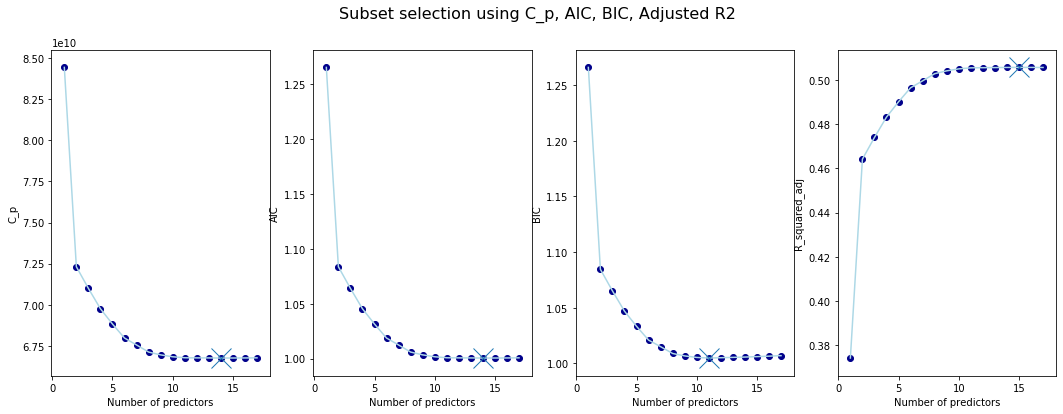

In [315]:
variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16)
plt.show()

In [177]:
#16 variables have the smallest Cp and AIC however that still seems like a lot of variables (mostly dummies)

In [316]:
df1['features'][14]

['scaled_sqft_living',
 'lat_long',
 'bathrooms',
 'bedrooms',
 'cond_3',
 'bedrooms_sq',
 'flr_2.5',
 'sqft_lot',
 'flr_1.5',
 'cond_5',
 'yr_reno_2010',
 'flr_3.5',
 'flr_3.0',
 'flr_2.0']

#### Create train and test sets

In [317]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 42)

In [318]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [319]:
train_residuals = y_hat_train - Y_train
test_residuals = y_hat_test - Y_test

In [320]:
mse_train = np.sum((Y_train - y_hat_train)**2)/len(Y_train)
mse_test = np.sum((Y_test - y_hat_test)**2)/len(Y_test)
print('Train MSE: ', mse_train)
print('Test MSE: ', mse_test)

Train MSE:  66864377443.49755
Test MSE:  357857131201.84607


In [321]:
linreg.coef_

array([ 203924.50313921, -193184.9435082 ,   72621.79566449,
        203937.01260501,   22874.13461339,    -363.22486789,
       -116802.4103311 ,   54558.94157539,    7552.42909507,
        293295.16340131,   31218.83802633,  202143.39932273,
         75974.88206445,   34026.3225691 ,   83995.69496661,
        138271.1046681 ,   98644.72496985])

In [322]:
linreg.intercept_

36098593.38984495

#### K-Folds

In [323]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

mse = make_scorer(mean_squared_error)

cv_result = cross_val_score(linreg, X, Y, cv = 10, scoring = mse)

In [324]:
cv_result.mean()

125862088257.02661